In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.float_format', '{:.3f}'.format)
# pd.reset_option('display.float_format')

pd.reset_option('display.float_format')# Clients


In [99]:

client_dtypes = {
   'CLIENT_ID': 'uint64',
   'TARGET': 'boolean',
   'IS_TRAIN': 'boolean',
}
clients = pd.read_csv(
   'data/CLIENTS_SAMPLE.csv',
   sep=',',
   dtype=client_dtypes
)

# Rename columns to be lowercase
clients = clients.rename(columns=str.lower)

# Convert bool columns to 0 and 1
clients = clients.astype({col: 'int8' for col, dtype in zip(clients.columns, clients.dtypes) if dtype in ('bool', 'boolean')})

In [100]:
clients.head()

,client_id,target,is_train
0,844657872407781,0,1
1,1848329230392841,0,1
2,2287540886390017,1,0
3,2814140106904111,0,1
4,4054326101950781,0,1


In [101]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36337 entries, 0 to 36336
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  36337 non-null  uint64
 1   target     36337 non-null  int8  
 2   is_train   36337 non-null  int8  
dtypes: int8(2), uint64(1)
memory usage: 355.0 KB


In [102]:
# clients.describe()
clients[['target', 'is_train']].mean().to_frame('Fraction')

,Fraction
target,0.244131
is_train,0.792360


# Transactions

In [95]:
# read transactions
transactions_dtypes = {
   'CLIENT_ID': 'uint64',
   'CAT_C2': 'category',
   'CAT_C3': 'category',
   'CAT_C4': 'category',
   'FL_C6': 'bool',
   'FL_C7': 'bool',
   'FL_C8': 'bool',
   'FL_C9': 'bool',
   'FL_C10': 'bool',
   'FL_C11': 'bool',
   'FL_C12': 'bool',
   'FL_C13': 'bool',
   'FL_C14': 'bool',
   'FL_C15': 'bool',
   'FLOAT_C16': 'float32',
   'FLOAT_C17': 'float32',
   'FLOAT_C18': 'float32',
   'INT_C19': 'int32',
   'FLOAT_C20': 'float32',
   'FLOAT_C21': 'float32'
}

transactions = pd.read_csv(
   'data/initial/TRANSACTIONS.csv',
   sep=',',
   dtype=transactions_dtypes,
   parse_dates=["TRAN_DATE"],
)


# Rename columns to be lowercase
transactions = transactions.rename(columns=str.lower)

# Convert bool columns to 0 and 1
transactions = transactions.astype({col: 'int8' for col, dtype in zip(transactions.columns, transactions.dtypes) if dtype in ('bool', 'boolean')})

# Convert categorical columns to int
transactions = transactions.astype({col: 'int32' for col, dtype in zip(transactions.columns, transactions.dtypes) if dtype == 'category'})


In [96]:
transactions.head()

,client_id,tran_date,cat_c2,cat_c3,cat_c4,fl_c6,fl_c7,fl_c8,fl_c9,fl_c10,...,fl_c12,fl_c13,fl_c14,fl_c15,float_c16,float_c17,float_c18,int_c19,float_c20,float_c21
0,12786769158523898411,2025-04-15,15,314,31,0,1,1,0,0,...,1,0,0,0,0.000,0.000,7.000,-1,0.000,7.000
1,12786769158523898411,2025-04-15,14,305,31,0,1,1,0,0,...,0,0,0,0,0.000,0.000,10.000,1,0.000,10.000
2,12786769158523898411,2025-08-16,4,209,31,0,1,1,0,0,...,0,1,1,0,0.000,0.000,3.600,-1,0.000,3.600
3,12786769158523898411,2025-08-16,4,209,31,0,1,1,0,0,...,0,1,1,0,0.000,0.000,8.200,-1,0.000,8.200
4,12786769158523898411,2025-08-17,4,207,31,0,1,1,0,0,...,0,1,1,0,0.000,0.000,0.650,-1,0.000,0.650


In [97]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15654626 entries, 0 to 15654625
Data columns (total 21 columns):
 #   Column     Dtype         
---  ------     -----         
 0   client_id  uint64        
 1   tran_date  datetime64[ns]
 2   cat_c2     int32         
 3   cat_c3     int32         
 4   cat_c4     int32         
 5   fl_c6      int8          
 6   fl_c7      int8          
 7   fl_c8      int8          
 8   fl_c9      int8          
 9   fl_c10     int8          
 10  fl_c11     int8          
 11  fl_c12     int8          
 12  fl_c13     int8          
 13  fl_c14     int8          
 14  fl_c15     int8          
 15  float_c16  float32       
 16  float_c17  float32       
 17  float_c18  float32       
 18  int_c19    int32         
 19  float_c20  float32       
 20  float_c21  float32       
dtypes: datetime64[ns](1), float32(5), int32(4), int8(10), uint64(1)
memory usage: 925.6 MB


In [98]:
transactions.describe()

,client_id,tran_date,cat_c2,cat_c3,cat_c4,fl_c6,fl_c7,fl_c8,fl_c9,fl_c10,...,fl_c12,fl_c13,fl_c14,fl_c15,float_c16,float_c17,float_c18,int_c19,float_c20,float_c21
count,15654626.000,15654626,15654626.000,15654626.000,15654626.000,15654626.000,15654626.000,15654626.000,15654626.000,15654626.000,...,15654626.000,15654626.000,15654626.000,15654626.000,15654626.000,15654626.000,15654626.000,15654626.000,15654626.000,15654626.000
mean,9240780271673835520.000,2025-04-17 18:07:42.865049088,13.106,285.180,48.336,0.011,0.968,0.998,0.002,0.000,...,0.275,0.223,0.209,0.091,0.030,0.060,59.765,-0.317,1.393,58.373
min,844657872407781.000,2024-12-01 00:00:00,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,-28.110,-114.720,0.000,-1.000,0.000,0.000
25%,4622553316739914752.000,2025-03-04 00:00:00,12.000,259.000,31.000,0.000,1.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,4.000,-1.000,0.000,3.600
50%,9241954116694513664.000,2025-04-20 00:00:00,14.000,305.000,31.000,0.000,1.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,10.000,-1.000,0.000,10.000
75%,13836444762496651264.000,2025-06-01 00:00:00,15.000,314.000,31.000,0.000,1.000,1.000,0.000,0.000,...,1.000,0.000,0.000,0.000,0.000,0.000,40.000,1.000,0.000,39.000
max,18445804434380068864.000,2025-08-31 00:00:00,74.000,422.000,894.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,413.130,2294.720,55600.000,1.000,13500.000,55600.000
std,5339184730032779264.000,NaN,8.332,48.835,104.940,0.104,0.176,0.039,0.039,0.014,...,0.447,0.416,0.407,0.287,0.316,1.303,210.647,0.948,35.902,207.463


In [99]:
transactions_sample = transactions.sample(frac=0.01)
transactions_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156546 entries, 12949692 to 11510482
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   client_id  156546 non-null  uint64        
 1   tran_date  156546 non-null  datetime64[ns]
 2   cat_c2     156546 non-null  int32         
 3   cat_c3     156546 non-null  int32         
 4   cat_c4     156546 non-null  int32         
 5   fl_c6      156546 non-null  int8          
 6   fl_c7      156546 non-null  int8          
 7   fl_c8      156546 non-null  int8          
 8   fl_c9      156546 non-null  int8          
 9   fl_c10     156546 non-null  int8          
 10  fl_c11     156546 non-null  int8          
 11  fl_c12     156546 non-null  int8          
 12  fl_c13     156546 non-null  int8          
 13  fl_c14     156546 non-null  int8          
 14  fl_c15     156546 non-null  int8          
 15  float_c16  156546 non-null  float32       
 16  float_c17  15654

In [108]:
transactions_sample.describe()

,client_id,tran_date,cat_c2,cat_c3,cat_c4,fl_c6,fl_c7,fl_c8,fl_c9,fl_c10,...,fl_c13,fl_c14,fl_c15,float_c16,float_c17,float_c18,int_c19,float_c20,float_c21,float_c16_abs
count,156546.000,156546,156546.000,156546.000,156546.000,156546.000,156546.000,156546.000,156546.000,156546.000,...,156546.000,156546.000,156546.000,156546.000,156546.000,156546.000,156546.000,156546.000,156546.000,156546.000
mean,9234698427452905472.000,2025-04-17 10:19:18.744394752,13.110,285.012,48.554,0.011,0.968,0.998,0.002,0.000,...,0.223,0.209,0.091,0.030,0.061,58.629,-0.318,1.286,57.343,0.031
min,844657872407781.000,2024-12-01 00:00:00,1.000,2.000,8.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,-5.440,-16.290,0.000,-1.000,0.000,0.000,0.000
25%,4605595555486785024.000,2025-03-03 00:00:00,12.000,259.000,31.000,0.000,1.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,4.000,-1.000,0.000,3.600,0.000
50%,9243913349828409344.000,2025-04-20 00:00:00,14.000,305.000,31.000,0.000,1.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,10.000,-1.000,0.000,10.000,0.000
75%,13821126788193781760.000,2025-06-01 00:00:00,15.000,314.000,31.000,0.000,1.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,40.000,1.000,0.000,37.000,0.000
max,18445804434380068864.000,2025-08-31 00:00:00,74.000,421.000,860.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,35.340,663.030,33151.012,1.000,5001.020,33151.012,35.340
std,5348663789530574848.000,NaN,8.358,48.937,106.093,0.105,0.176,0.040,0.040,0.016,...,0.417,0.407,0.287,0.269,1.919,215.229,0.948,33.778,212.847,0.268


In [101]:
# Get the mean of transactions by client
transactions_sample.groupby('client_id').size().mean()

np.float64(5.552654914340439)

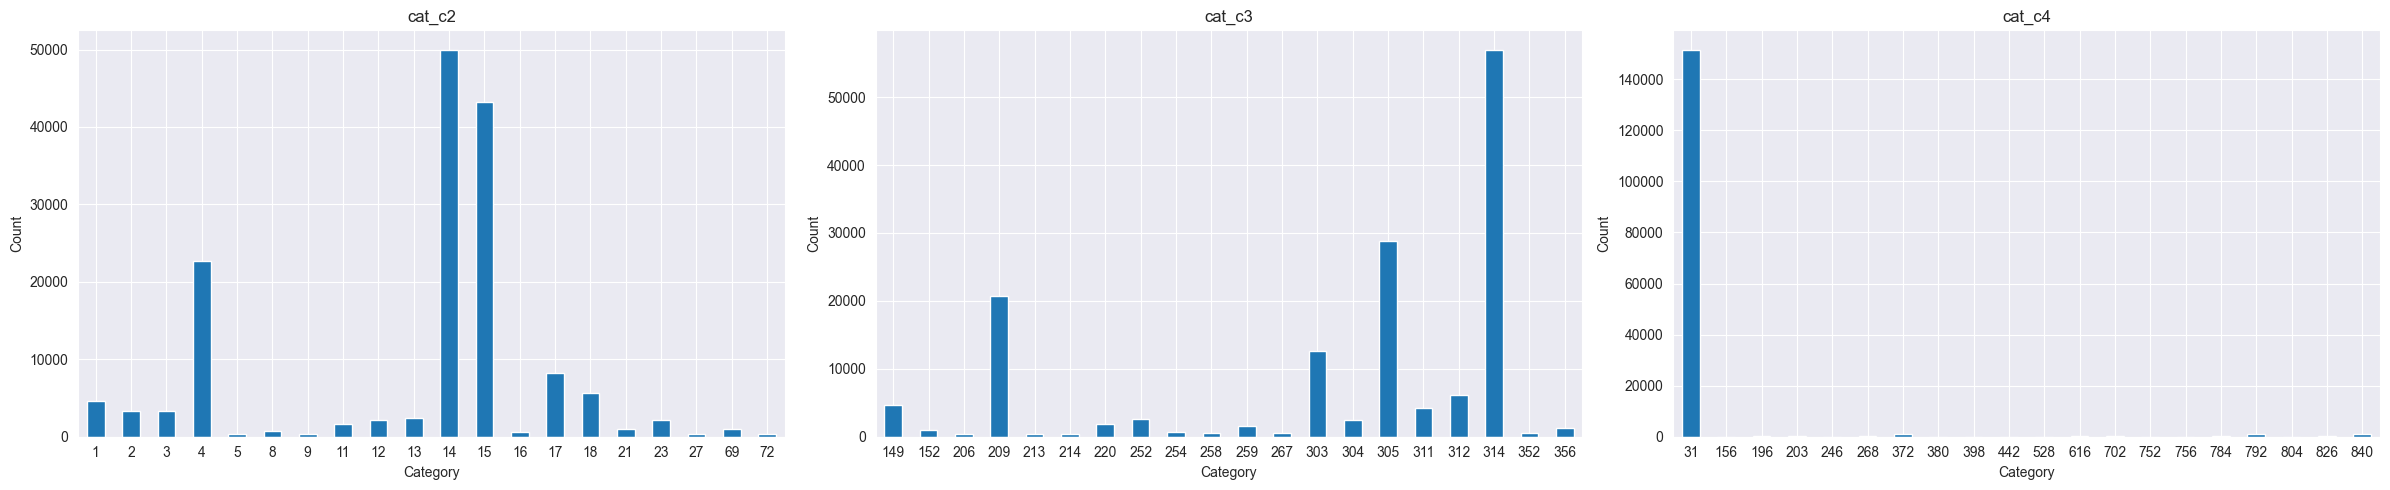

In [102]:
# Categorical data plots

cat_cols = ['cat_c2', 'cat_c3', 'cat_c4']
nrows = 1
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8 * ncols, 5 * nrows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    counts = transactions_sample[col].astype(int).value_counts().head(20).sort_index()
    counts.plot(kind='bar', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Category')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# counts = transactions_sample['cat_c2'].astype(int).value_counts().head(20).sort_index()
# counts.plot(kind="bar", figsize=(12, 5))

# sns.countplot(x="cat_c2", data=transactions_sample, order=sorted(transactions_sample['cat_c2'].unique()))
# plt.xticks(rotation=90)
# plt.title("Distribution of cat_c2")
# plt.show()

In [104]:
# Categorical data counts

for col in ['cat_c2', 'cat_c3', 'cat_c4']:
    print(transactions_sample[col].astype(int).value_counts().sort_index())
    print()

cat_c2
1      4666
2      3316
3      3330
4     22638
5       413
6        76
7       170
8       796
9       368
10      226
11     1702
12     2205
13     2401
14    49975
15    43178
16      663
17     8167
18     5633
20      335
21     1044
23     2194
24       63
25       19
26       87
27      355
28      175
29        3
31      190
36        1
38        8
41       31
44      129
64      102
68       73
69     1028
70       35
71       40
72      393
73      313
74        5
Name: count, dtype: int64

cat_c3
2        5
3        1
5       47
6        2
9        1
      ... 
416     79
418      3
419     28
420    276
421     10
Name: count, Length: 222, dtype: int64

cat_c4
8           5
31     151534
36          4
40          8
48          8
        ...  
804        33
818         3
826       113
840       959
860         8
Name: count, Length: 66, dtype: int64



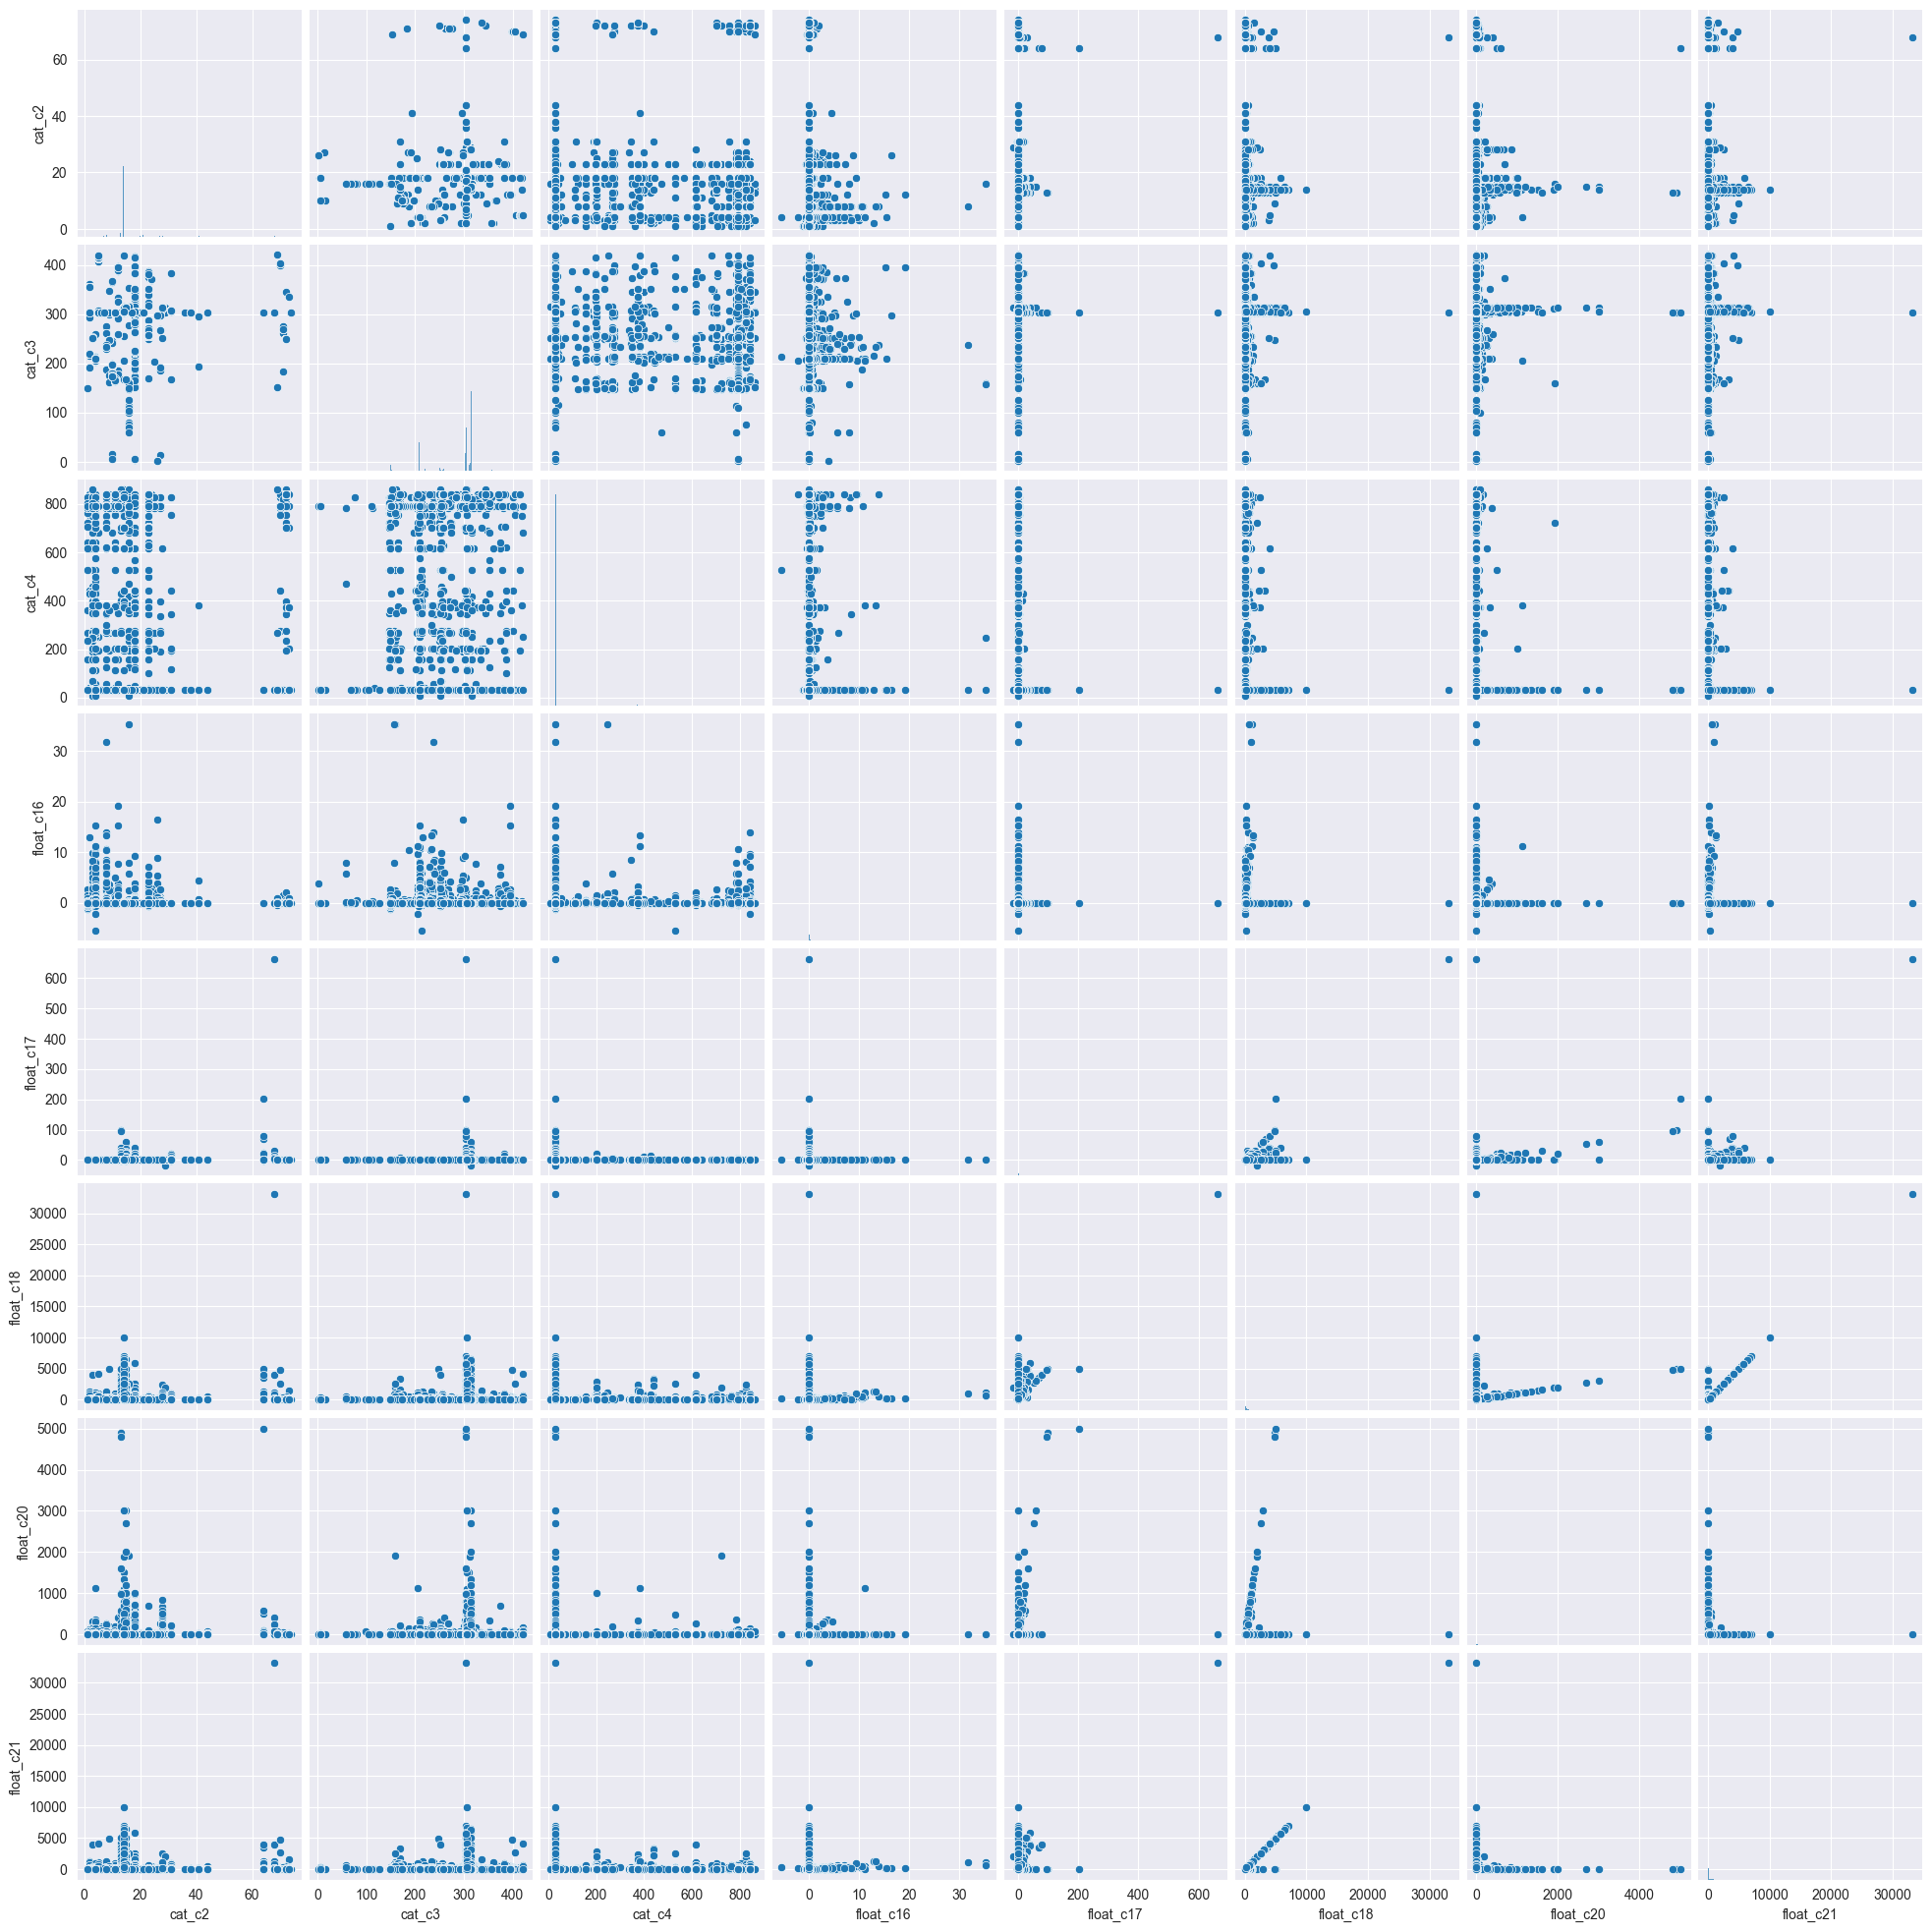

In [105]:
sns.pairplot(transactions_sample[['cat_c2', 'cat_c3', 'cat_c4', 'float_c16', 'float_c17', 'float_c18', 'float_c20', 'float_c21']])

In [106]:
# Correlation matrix
transactions_sample[['cat_c2', 'cat_c3', 'cat_c4', 'float_c16', 'float_c17', 'float_c18', 'float_c20', 'float_c21']].corr()

,cat_c2,cat_c3,cat_c4,float_c16,float_c17,float_c18,float_c20,float_c21
cat_c2,1.000,0.349,0.164,-0.100,0.040,0.049,0.014,0.047
cat_c3,0.349,1.000,-0.108,-0.143,0.017,0.107,0.010,0.107
cat_c4,0.164,-0.108,1.000,0.040,-0.002,-0.017,0.002,-0.018
float_c16,-0.100,-0.143,0.040,1.000,-0.003,0.020,0.011,0.019
float_c17,0.040,0.017,-0.002,-0.003,1.000,0.471,0.278,0.432
float_c18,0.049,0.107,-0.017,0.020,0.471,1.000,0.149,0.988
float_c20,0.014,0.010,0.002,0.011,0.278,0.149,1.000,-0.008
float_c21,0.047,0.107,-0.018,0.019,0.432,0.988,-0.008,1.000


## Transactions (data insights)

In [91]:
# fl_c6 = 1 (True) only if float_c17 <= 0

transactions[transactions['fl_c6'] == 1]['float_c17'].max()
# transactions[transactions['float_c17'] < 0]['fl_c6'].min()

np.float32(0.0)

In [90]:
# int_c19 = 1 only if float_c16 <= 0 and int_c19 = -1 only if float_c16 >= 0

transactions_sample[(transactions_sample['int_c19'] == -1)]['float_c16'].max()

np.float32(99.75)

# App activity

In [7]:
app_activity_dtypes = {
   'CLIENT_ID': 'uint64',
   'DEVICE_ID': 'uint64',
   'CAT_C3': 'Int32',
   'CAT_C4': 'Int32',
   'CAT_C5': 'Int32',
   'CAT_C6': 'Int32',
   'CAT_C8': 'boolean',
   'CAT_C9': 'Int32',
   'CAT_C10': 'boolean',
   'FLOAT_C11': 'float32',
   'FLOAT_C12': 'float32',
   'FLOAT_C13': 'float32',
   'FLOAT_C14': 'float32',
   'FLOAT_C15': 'float32',
   'FLOAT_C16': 'float32',
   'FLOAT_C17': 'float32'
}

app_activity = pd.read_csv(
   'data/initial/APP_ACTIVITY.csv',
   sep=',',
   dtype=app_activity_dtypes,
   parse_dates=["ACTIVITY_DATE"],
)

# Rename columns to be lowercase
app_activity = app_activity.rename(columns=str.lower)

# Convert bool columns to 0 and 1
app_activity = app_activity.astype({col: 'Int8' for col, dtype in zip(app_activity.columns, app_activity.dtypes) if dtype in ('bool', 'boolean')})

In [9]:
app_activity.head()

,client_id,device_id,activity_date,cat_c3,cat_c4,cat_c5,cat_c6,cat_c8,cat_c9,cat_c10,float_c11,float_c12,float_c13,float_c14,float_c15,float_c16,float_c17
0,5142833616684540,3505704293824438385,2025-05-12,21,1,3,1,1,2,1,34.000,70.000,NaN,0.550,NaN,NaN,NaN
1,5142833616684540,3505704293824438385,2025-05-12,21,1,3,1,1,2,1,34.000,70.000,NaN,0.550,NaN,NaN,NaN
2,5142833616684540,3505704293824438385,2025-05-12,21,1,3,1,1,2,1,34.000,70.000,NaN,0.550,NaN,NaN,NaN
3,5142833616684540,3505704293824438385,2025-05-13,21,1,3,1,1,2,1,34.000,100.000,NaN,0.550,NaN,NaN,NaN
4,5142833616684540,3505704293824438385,2025-01-26,21,1,3,1,1,2,1,38.000,70.000,NaN,0.350,NaN,NaN,NaN


In [10]:
app_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17738592 entries, 0 to 17738591
Data columns (total 17 columns):
 #   Column         Dtype         
---  ------         -----         
 0   client_id      uint64        
 1   device_id      uint64        
 2   activity_date  datetime64[ns]
 3   cat_c3         Int32         
 4   cat_c4         Int32         
 5   cat_c5         Int32         
 6   cat_c6         Int32         
 7   cat_c8         Int8          
 8   cat_c9         Int32         
 9   cat_c10        Int8          
 10  float_c11      float32       
 11  float_c12      float32       
 12  float_c13      float32       
 13  float_c14      float32       
 14  float_c15      float32       
 15  float_c16      float32       
 16  float_c17      float32       
dtypes: Int32(5), Int8(2), datetime64[ns](1), float32(7), uint64(2)
memory usage: 1.3 GB


In [11]:
app_activity.describe()

,client_id,device_id,activity_date,cat_c3,cat_c4,cat_c5,cat_c6,cat_c8,cat_c9,cat_c10,float_c11,float_c12,float_c13,float_c14,float_c15,float_c16,float_c17
count,17738592.000,17738592.000,17738592,17734699.000,17600200.000,17738445.000,17738592.000,17673411.000,17693001.000,17695745.000,17695744.000,17695744.000,3741017.000,17695744.000,10185047.000,10185047.000,10185047.000
mean,9213022061638150144.000,9189963150464303104.000,2025-04-14 10:22:59.986686208,20.859,1.031,3.020,2.130,0.882,1.422,0.623,38.577,55.344,111.950,0.866,0.001,5.298,6.690
min,844657872407781.000,58727864829306.000,2024-12-01 00:00:00,1.000,1.000,1.000,1.000,0.000,1.000,0.000,-1.000,0.000,-100.000,0.000,-78.470,-78.444,-83.055
25%,4599620883172215296.000,4592400023451019264.000,2025-02-27 00:00:00,21.000,1.000,3.000,1.000,1.000,1.000,0.000,10.000,35.000,121.000,0.300,-0.954,3.686,5.710
50%,9200957023775523840.000,9181651220149671936.000,2025-04-16 00:00:00,21.000,1.000,3.000,2.000,1.000,1.000,1.000,38.000,55.000,121.000,0.533,-0.028,5.515,7.743
75%,13795822120945643520.000,13718510936143462400.000,2025-05-30 00:00:00,21.000,1.000,3.000,3.000,1.000,2.000,1.000,64.000,77.000,121.000,0.800,0.803,7.364,8.944
max,18445804434380068864.000,18445846969850038272.000,2025-08-31 00:00:00,23.000,8.000,15.000,8.000,1.000,2.000,1.000,99.000,100.000,121.000,64.247,156.797,78.482,102.414
std,5336003637047096320.000,5308719376650750976.000,NaN,1.369,0.230,0.379,1.461,0.322,0.494,0.485,28.554,26.119,20.428,1.856,2.209,2.870,3.472


In [13]:
app_activity_sample = app_activity.sample(frac=0.01)
app_activity_sample.describe()

,client_id,device_id,activity_date,cat_c3,cat_c4,cat_c5,cat_c6,cat_c8,cat_c9,cat_c10,float_c11,float_c12,float_c13,float_c14,float_c15,float_c16,float_c17
count,177386.000,177386.000,177386,177346.000,175922.000,177381.000,177386.000,176670.000,176874.000,176905.000,176905.000,176905.000,37358.000,176905.000,101708.000,101708.000,101708.000
mean,9219988870055225344.000,9207369158683367424.000,2025-04-14 12:06:19.430169344,20.854,1.032,3.022,2.129,0.882,1.422,0.625,38.483,55.343,112.089,0.877,0.004,5.297,6.702
min,844657872407781.000,104983071147102.000,2024-12-01 00:00:00,1.000,1.000,1.000,1.000,0.000,1.000,0.000,-1.000,0.000,-85.000,0.000,-28.857,-78.346,-23.568
25%,4601512590882080256.000,4601503490892401664.000,2025-02-27 00:00:00,21.000,1.000,3.000,1.000,1.000,1.000,0.000,10.000,35.000,121.000,0.300,-0.965,3.691,5.709
50%,9212124327610338304.000,9234007836927342592.000,2025-04-16 00:00:00,21.000,1.000,3.000,2.000,1.000,1.000,1.000,38.000,55.000,121.000,0.533,-0.028,5.521,7.738
75%,13790723143088058368.000,13736439674513862656.000,2025-05-30 00:00:00,21.000,1.000,3.000,3.000,1.000,2.000,1.000,64.000,76.000,121.000,0.800,0.805,7.367,8.944
max,18445804434380068864.000,18445829833925658624.000,2025-08-31 00:00:00,23.000,8.000,15.000,8.000,1.000,2.000,1.000,98.000,100.000,121.000,32.122,24.044,24.250,34.759
std,5331752832696457216.000,5308739434745363456.000,NaN,1.394,0.241,0.393,1.460,0.323,0.494,0.484,28.530,26.097,20.308,1.885,2.203,2.883,3.455


In [14]:
# Get the mean of app activity by client
app_activity_sample.groupby('client_id').size().mean()

np.float64(5.812504095943377)

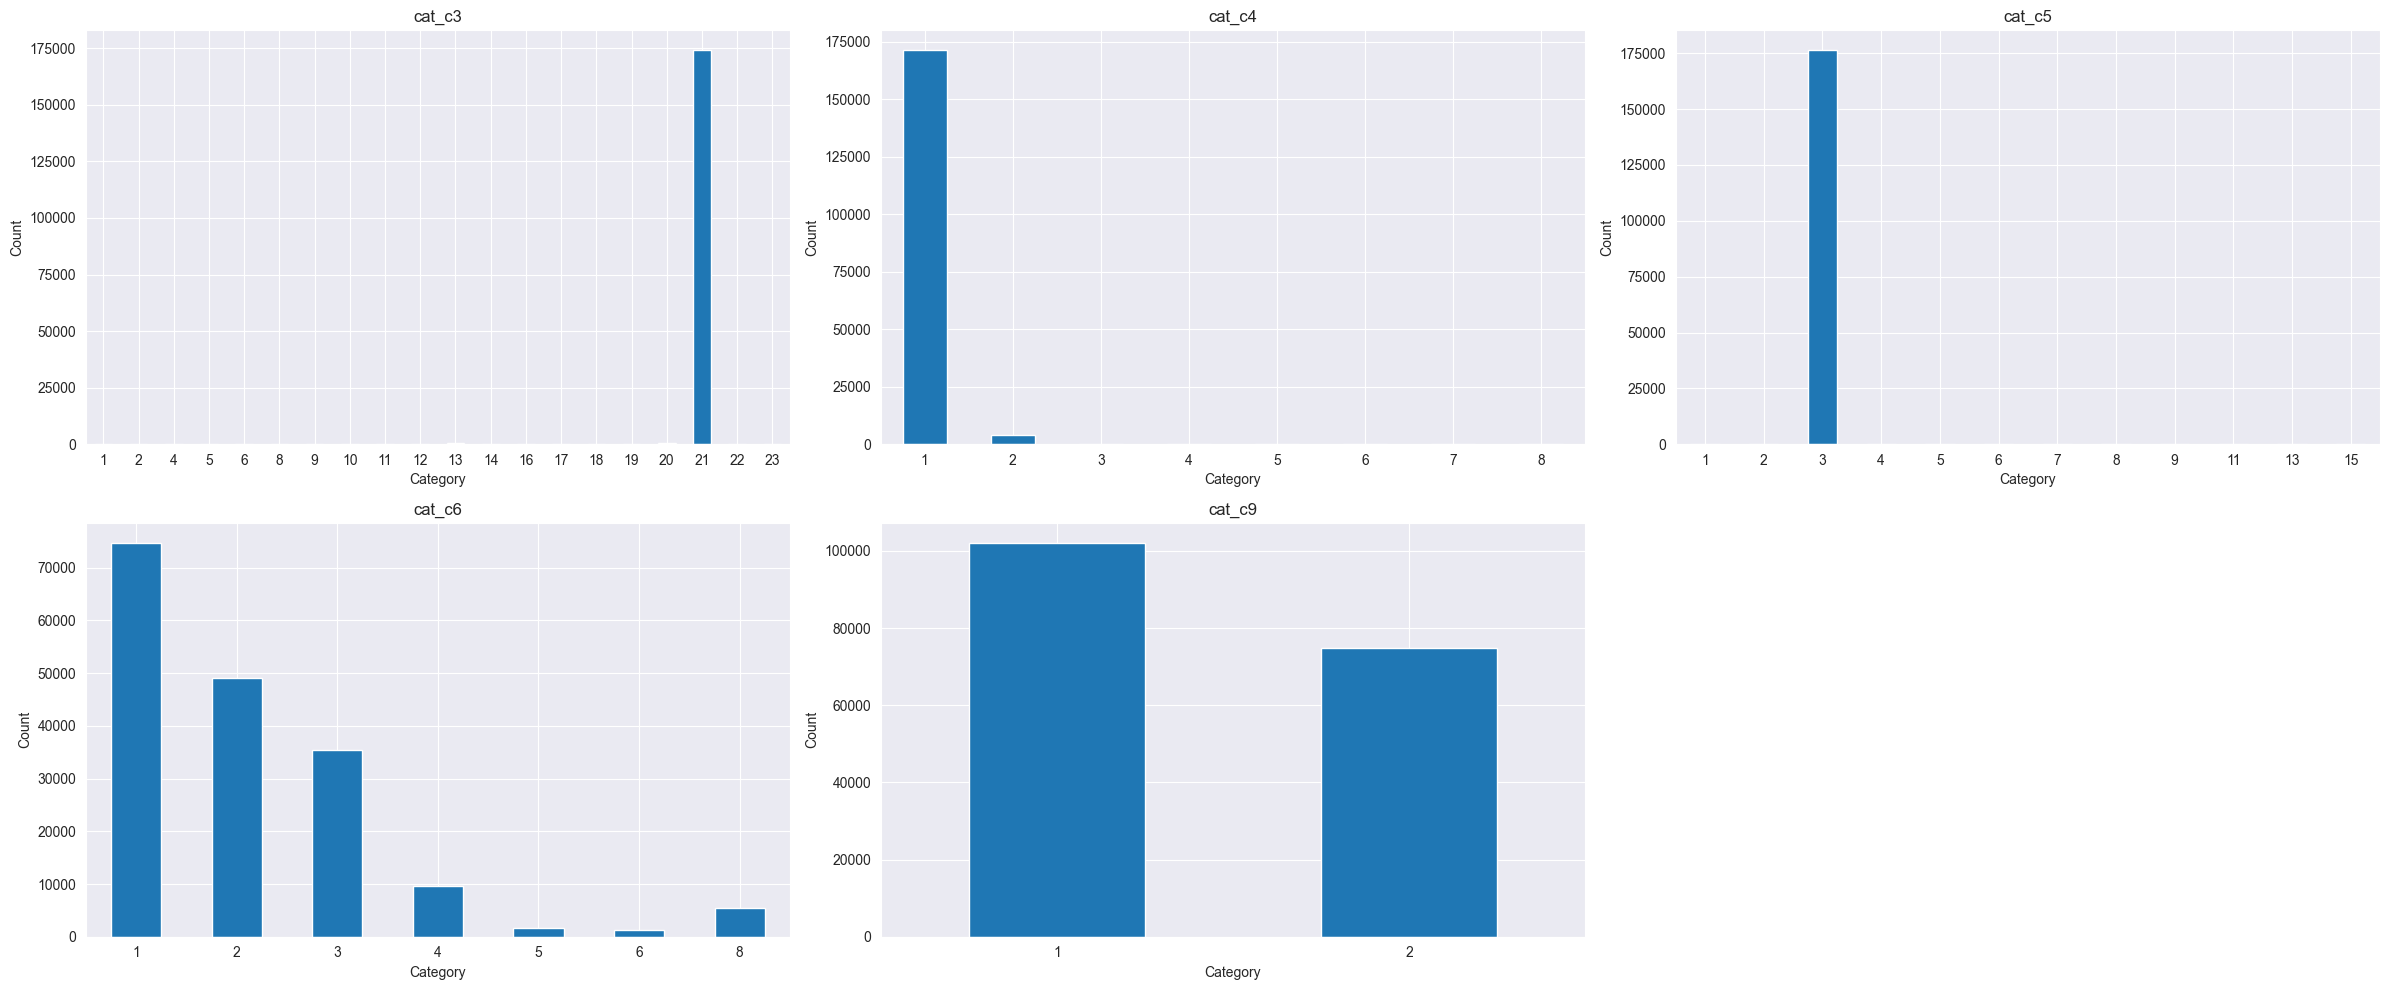

In [23]:
cat_cols = ['cat_c3', 'cat_c4', 'cat_c5', 'cat_c6', 'cat_c9']
nrows = 2
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8 * ncols, 5 * nrows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    counts = app_activity_sample[col].value_counts().head(20).sort_index()
    counts.plot(kind='bar', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Category')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=0)

for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [18]:
# Categorical data counts

for col in cat_cols:
    print(app_activity_sample[col].value_counts().sort_index())
    print()

cat_c3
1        282
2         44
3         10
4        279
5         12
6         14
7         11
8        146
9         82
10       267
11        19
12        77
13       686
14        26
15        12
16        60
17        60
18        94
19        85
20       734
21    174178
22        48
23       120
Name: count, dtype: Int64

cat_c4
1    171430
2      4018
3       225
4        74
5        59
6        51
7        48
8        17
Name: count, dtype: Int64

cat_c5
1         97
2         78
3     176380
4          1
5         12
6        309
7        241
8          4
9         55
11       118
13        38
15        48
Name: count, dtype: Int64

cat_c6
1    74773
2    49102
3    35501
4     9620
5     1574
6     1366
8     5450
Name: count, dtype: Int64

cat_c9
1    102148
2     74726
Name: count, dtype: Int64



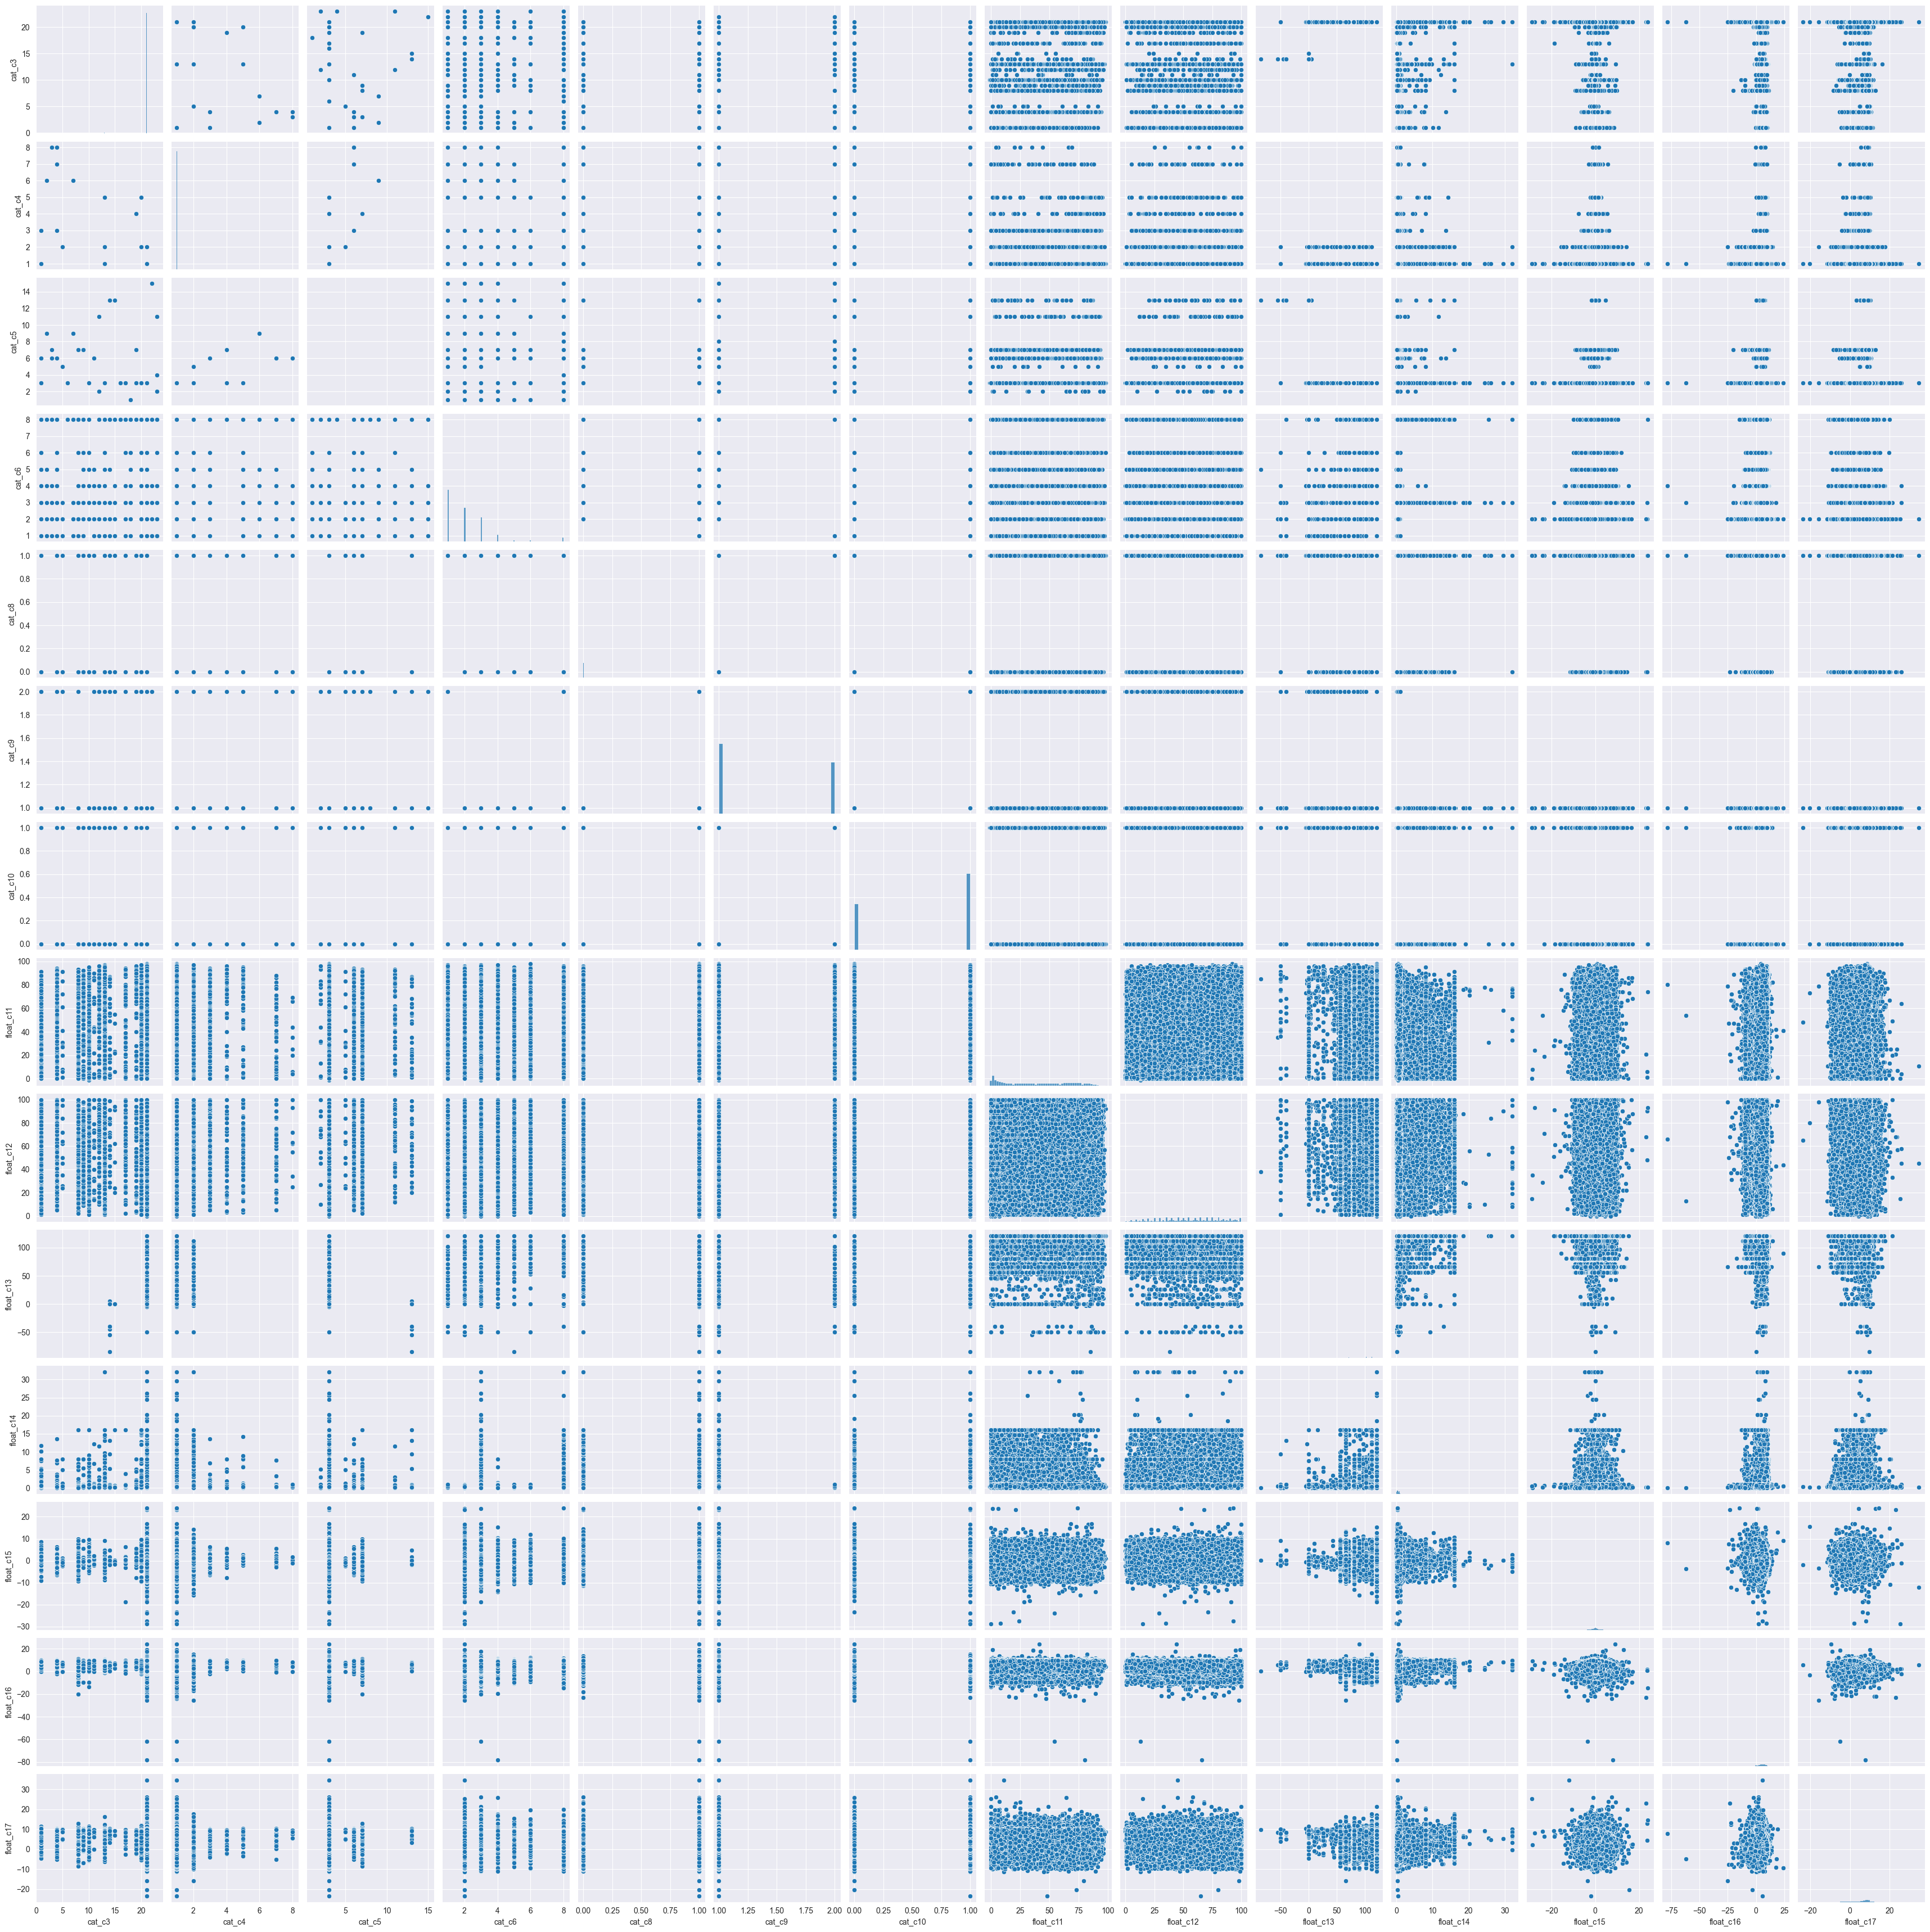

In [22]:
sns.pairplot(app_activity_sample[['cat_c3', 'cat_c4', 'cat_c5', 'cat_c6', 'cat_c8', 'cat_c9', 'cat_c10', 'float_c11', 'float_c12', 'float_c13', 'float_c14', 'float_c15', 'float_c16', 'float_c17']])

In [21]:
# Correlation matrix
app_activity_sample[['cat_c3', 'cat_c4', 'cat_c5', 'cat_c6', 'cat_c8', 'cat_c9', 'cat_c10', 'float_c11', 'float_c12', 'float_c13', 'float_c14', 'float_c15', 'float_c16', 'float_c17']].corr()

,cat_c3,cat_c4,cat_c5,cat_c6,cat_c8,cat_c9,cat_c10,float_c11,float_c12,float_c13,float_c14,float_c15,float_c16,float_c17
cat_c3,1.000,-0.631,-0.388,-0.043,0.023,0.026,-0.014,-0.022,0.003,0.173,-0.003,0.002,0.006,0.003
cat_c4,-0.631,1.000,0.612,0.043,-0.024,-0.024,0.021,0.028,-0.005,-0.425,0.006,-0.006,-0.010,-0.014
cat_c5,-0.388,0.612,1.000,0.036,-0.009,-0.014,0.003,0.012,0.002,-0.173,0.003,-0.003,-0.011,-0.004
cat_c6,-0.043,0.043,0.036,1.000,-0.266,-0.661,0.030,0.326,0.055,-0.022,0.121,0.008,-0.004,0.002
cat_c8,0.023,-0.024,-0.009,-0.266,1.000,0.313,-0.039,0.026,-0.009,0.030,-0.299,0.009,0.014,-0.003
cat_c9,0.026,-0.024,-0.014,-0.661,0.313,1.000,-0.055,-0.344,-0.099,0.032,-0.138,NaN,NaN,NaN
cat_c10,-0.014,0.021,0.003,0.030,-0.039,-0.055,1.000,-0.021,-0.005,0.006,-0.003,0.017,0.049,-0.107
float_c11,-0.022,0.028,0.012,0.326,0.026,-0.344,-0.021,1.000,0.108,-0.056,-0.077,-0.004,0.024,-0.003
float_c12,0.003,-0.005,0.002,0.055,-0.009,-0.099,-0.005,0.108,1.000,-0.024,0.003,-0.003,-0.012,0.027
float_c13,0.173,-0.425,-0.173,-0.022,0.030,0.032,0.006,-0.056,-0.024,1.000,-0.011,0.012,0.078,0.032


# Communications

In [28]:
# read communications
communications_dtypes = {
   'CLIENT_ID': 'uint64',
   "CAT_C2": "category",
   "CAT_C3": "category",
   "CAT_C4": "category",
   "CAT_C5": "category",

}

communications = pd.read_csv(
   'data/initial/COMMUNICATIONS.csv',
   sep=',',
   dtype=communications_dtypes,
   parse_dates=["CONTACT_DATE"],
)

communications = communications.rename(columns=str.lower)

In [30]:
communications.head()

,client_id,contact_date,cat_c2,cat_c3,cat_c4,cat_c5
0,1064751079059572946,2025-02-04,S8406,4,1,4
1,1064751079059572946,2025-02-04,S3565,4,1,7
2,1064751079059572946,2025-02-04,S8404,4,1,4
3,1064751079059572946,2025-04-07,S27888,4,1,4
4,1064751079059572946,2025-04-07,S3769,4,1,4


In [31]:
communications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19586922 entries, 0 to 19586921
Data columns (total 6 columns):
 #   Column        Dtype         
---  ------        -----         
 0   client_id     uint64        
 1   contact_date  datetime64[ns]
 2   cat_c2        category      
 3   cat_c3        category      
 4   cat_c4        category      
 5   cat_c5        category      
dtypes: category(4), datetime64[ns](1), uint64(1)
memory usage: 392.3 MB


In [32]:
communications.describe()

,client_id,contact_date
count,19586922.000,19586922
mean,9239797239681857536.000,2025-04-17 04:33:31.363128576
min,844657872407781.000,2024-12-01 00:00:00
25%,4627148463317629952.000,2025-03-02 00:00:00
50%,9240516327123703808.000,2025-04-20 00:00:00
75%,13824959269844080640.000,2025-06-01 00:00:00
max,18445804434380068864.000,2025-08-31 00:00:00
std,5337613217225337856.000,NaN


In [33]:
# Get the mean of communications by client
communications.groupby('client_id').size().mean()

np.float64(547.0443234185169)

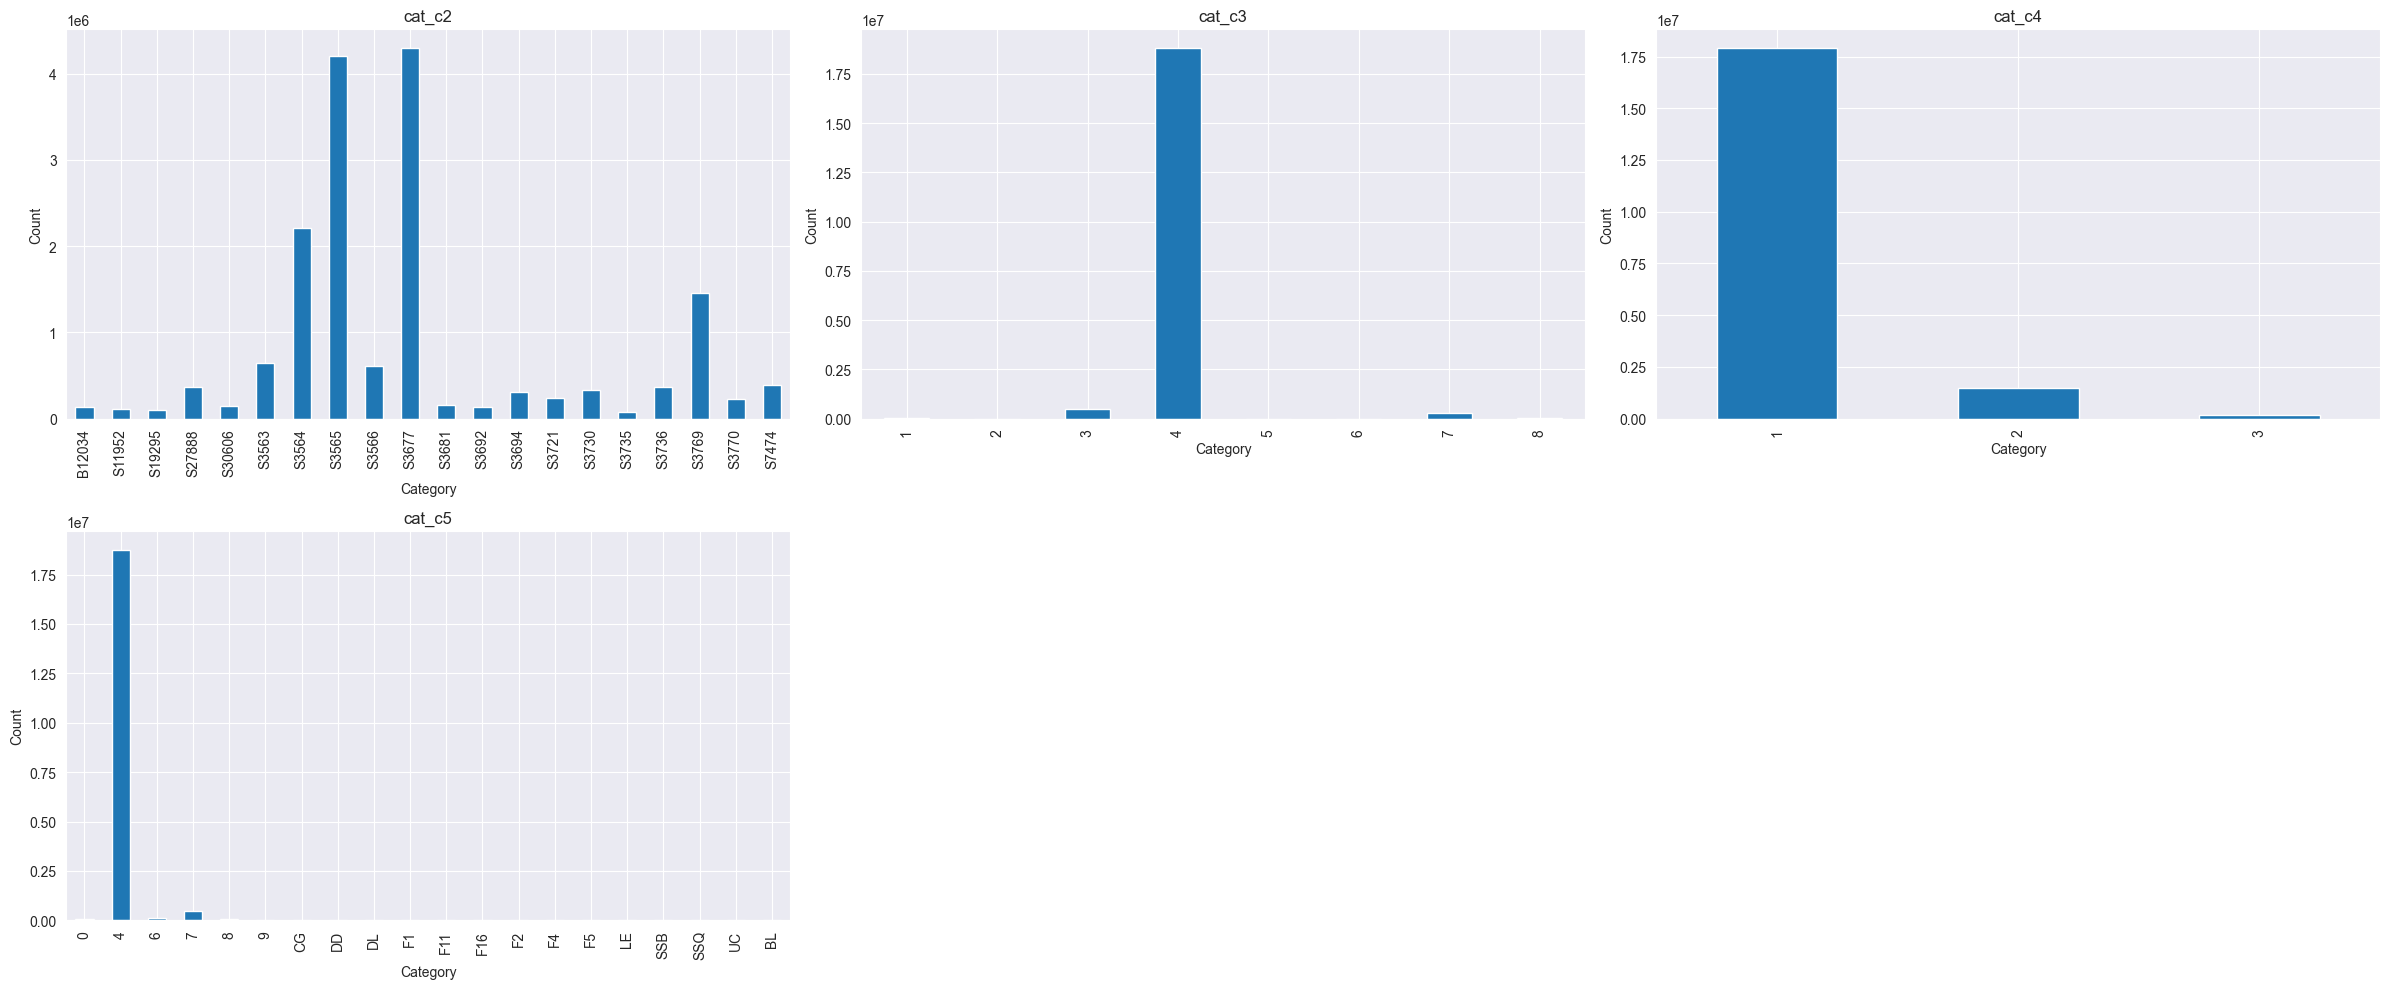

In [35]:
cat_cols = ['cat_c2', 'cat_c3', 'cat_c4', 'cat_c5']
nrows = 2
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8 * ncols, 5 * nrows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]
    counts = communications[col].value_counts().head(20).sort_index()
    counts.plot(kind='bar', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Category')
    ax.set_ylabel('Count')
    # ax.tick_params(axis='x', rotation=0)

for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [37]:
# Categorical data counts

for col in cat_cols:
    print(communications[col].value_counts().sort_values())
    print()

cat_c2
B14752          1
B14200          1
M34298          1
M8852           1
M14866          1
           ...   
S3563      644153
S3769     1459662
S3564     2204730
S3565     4208455
S3677     4297588
Name: count, Length: 966, dtype: int64

cat_c3
5          60
6          63
2         720
1        8660
8       25813
7      263172
3      471329
4    18817105
Name: count, dtype: int64

cat_c4
3      178731
2     1493694
1    17914497
Name: count, dtype: int64

cat_c5
A0            1
A7            1
A11           1
A3            1
F41           1
         ...   
8         50349
0         57174
6        129647
7        480205
4      18755881
Name: count, Length: 79, dtype: int64

